# Стратификация

## Необходимые модули

In [284]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import basinhopping
from math import ceil
import matplotlib.pyplot as plt

## Вспомогательные методы

In [435]:
def generate_sample(proportion, size, mu_differs, sigma_differs):
    sub_sample_sizes = np.array(list(map(lambda x: x * (size / sum(proportion)), proportion)))
    if mu_differs:
        mu_array = np.array([np.random.randint(-100, 100) for i in proportion])
    else:
        mu_array = np.array([np.random.randint(-10, 10)] * len(proportion))
    if sigma_differs:
        sigma_array = np.array([np.random.randint(10) for i in proportion])
    else:
        sigma_array = np.array([np.random.randint(10)] * len(proportion))
    result = np.hstack([np.random.normal(mu_array[i], sigma_array[i], size=sub_sample_sizes[i]) for i in range(len(proportion))])
    np.random.shuffle(result)
    return result

In [189]:
def simpleSalpmling(generalSample, subSampleSize):
    return np.array([generalSample[i] for i in list(np.random.randint(0, len(generalSample), subSampleSize))])

In [373]:
def proportional_sampling(proportion, sub_sample_size, general_sample):
    proportion = list(map(ceil, proportion))
    proportion = list(map(int, proportion))
    proportion = list(map(lambda x: x if x > 0 else 1, proportion))
    step = int(len(general_sample) / sum(proportion))
    count_pro_portion = int(sub_sample_size / sum(proportion))
    proportion = np.array(proportion)
    result = np.hstack([list(map(lambda x: general_sample[x], np.random.randint(min(step * sum(proportion[:i]), step * sum(proportion[:i + 1])), max(step * sum(proportion[:i]), step * sum(proportion[:i + 1])), count_pro_portion * proportion[i]))) for i in range(len(proportion))])
    np.random.shuffle(result)
    return result

In [350]:
def minimization_function(proportion, general_sample):
    hist = np.histogram(general_sample, 50, density=True)[0]
    sub_sample = proportional_sampling(proportion, len(general_sample) / 10, general_sample)
    hist1 = np.histogram(sub_sample, 50, density=True)[0]
    return sum(np.abs(hist - hist1))

In [380]:
def minimize_result(initial_proportion, sample):
    res = minimize(
        minimization_function,
        initial_proportion,
        args=(sample),
        method='SLSQP',
        options={'eps': 1.0, 'ftol': 1e-8, 'disp': True},
        bounds=[(1, 10) for i in initial_proportion]
    )
    print(list(map(int, list(map(ceil, res.x)))))
    return list(map(int, list(map(ceil, res.x))))
def minimize_result1(initial_proportion, sample):
    bounds = [(1, 10) for i in initial_proportion]
    minimizer_kwargs = {"method": "SLSQP", "args": sample, "bounds": bounds}
    res = basinhopping(minimization_function, initial_proportion, minimizer_kwargs=minimizer_kwargs, niter=20)
    x = list(map(ceil, res.x))
    x = list(map(int, x))
    x = list(map(lambda x: x if x > 0 else 1, x))
    print(x)
    return x

In [134]:
#def optimalSampling(generalSample, subSampleSize):
    

## Генерация выборки

In [453]:
proportion = (5, 2, 1)
sample = generate_sample(proportion, 1000 * sum(proportion), True, True)

(37.262223146673627, 57.811183375987596)
(39.037050251906756, 56.924164189403946)
(-1.774827105233129, 0.88701918658365031)


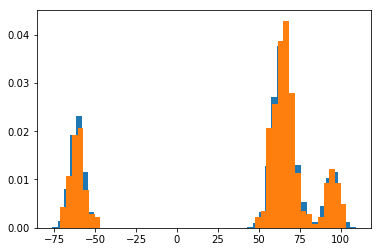

In [454]:
sub_sample = simpleSalpmling(sample, 50 * sum(proportion))
print(sample.mean(), sample.std())
print(sub_sample.mean(), sub_sample.std())
print(sample.mean() - sub_sample.mean(), sample.std() - sub_sample.std())
plt.hist(sample, 50, normed=True)
plt.hist(sub_sample, 50, normed=True)
plt.show()

[3, 2, 3]
(37.262223146673627, 57.811183375987596)
(37.330281076256036, 58.492057558726046)
(-0.06805792958240886, -0.68087418273844946)


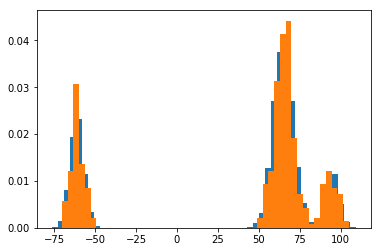

In [455]:
sub_sample = proportional_sampling(minimize_result1([1, 1, 1], sample), 50 * sum(proportion), sample)
print(sample.mean(), sample.std())
print(sub_sample.mean(), sub_sample.std())
print(sample.mean() - sub_sample.mean(), sample.std() - sub_sample.std())
plt.hist(sample, 50, normed=True)
plt.hist(sub_sample, 50, normed=True)
plt.show()